## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful unsupervised learning algorithm that clusters data based on density, not shape or centroids. Unlike k-means, you don't need to specify how many clusters to look for, and it can automatically identify and mark outliers as noisy points that shouldn't belong to any group.

##### Core Concepts:

- **Density**: DBSCAN defines clusters as high-density regions of points separated by lower-density areas.

- **No Pre-set Clusters**: You don't have to set 'k' clusters; DBSCAN finds them itself.

- **Outlier Detection**: Points too isolated get marked as outliers and are excluded from any cluster.

##### DBSCAN uses two important parameters:

- **eps (ε)**: Distance threshold—how close two points must be to be considered neighbors.

- **MinPts**: Minimum points needed in an eps-radius neighborhood to form a dense region.

##### How DBSCAN Clusters 

1. **Pick Parameters**
   - Set eps (distance) and MinPts (minimum neighbors needed).

2. **Analyze Each Point**
   - Draw a ball of radius eps around each point.
   - Count how many points fall within this ball.

3. **Determine Point Type**
   - **Core Point?** Has at least MinPts within eps radius.
   - **Border Point?** Near a core point, but not enough neighbors to be core itself.
   - **Noise?** Not enough neighbors, not near a core—marked as outlier (-1 label).

4. **Build Clusters**
   - Begin with a core point and find all its density-reachable neighbors.
   - Expand recursively: any point in the cluster whose own eps-neighborhood also meets MinPts expands the cluster further.
   - Border points are attached to their respective cluster if they're in a core's neighborhood.

5. **Repeat**
   - Continue until all points are assigned to a cluster (or marked as noise).
   - Clusters naturally take shape and number based on density in data—no arbitrary group assignments.[2][3][1]


##### Strengths vs K-Means

- **Automatic cluster count**: No need for k
- **Arbitrary shapes**: Finds blobs, rings, elongated clusters—not limited to circles or convex shapes
- **Handles outliers natively**: No separate step needed for outlier detection

K-means can't find non-spherical clusters and struggles with outliers or uneven cluster shapes. DBSCAN excels at those, but depends on correct tuning of eps and MinPts.

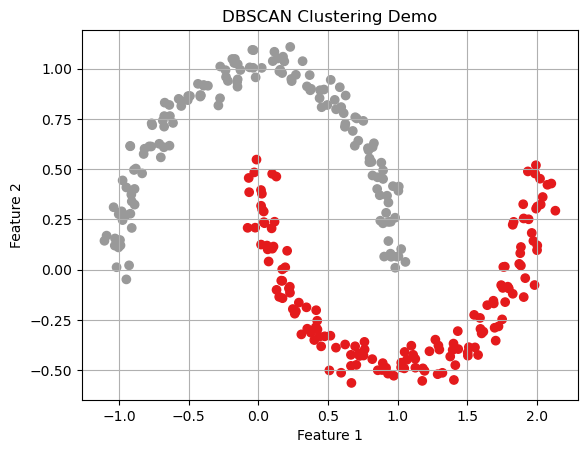

In [4]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Create a dataset with two moon-shaped clusters
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Run DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
db_labels = db.fit_predict(X)

# Plot clusters (outliers marked as -1)
plt.scatter(X[:,0], X[:,1], c=db_labels, cmap='Set1')
plt.title('DBSCAN Clustering Demo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

- `eps=0.2`: Sets the neighborhood radius (tune for your data shape)
- `min_samples=5`: Minimum points required to form a core
- `fit_predict(X)`: Assigns each sample to a cluster (or -1 as outlier)

##### Picking Parameters

- **Choosing eps:** Often done by plotting distances to the nearest neighbors (k-distance graph) and looking for a jump ('elbow' shape).

- **Choosing MinPts:** General rule is number of features + 1 (for 2D data, use at least 3). For richer data, start with 4-5 and tune based on results.

##### Typical Output

- **Cluster labeling**: Each point gets a label (0,1,2…) or -1 for outlier.

- **No ensemble runs needed**: Because DBSCAN isn’t random, it can be run once and reliably produces the same clusters, with only rare exceptions for ambiguous boundary points.


##### Key Limitations

- DBSCAN doesn't work well if clusters have very different densities (you may miss some clusters).
- Results are sensitive to parameter choices—bad guesses can lead most points marked as outliers or huge merged clusters.

##### When to Use DBSCAN?

Use DBSCAN when:
- Cluster shapes are complex (not simple circles)
- Outlier detection is essential
- You don't know cluster count up front
- You’re working with noise and want robust clusters

Try running DBSCAN with several values of eps and MinPts to see how clusters change, and always use scatterplots to visualize results.

Sources:

[1](https://www.datacamp.com/tutorial/dbscan-clustering-algorithm)
[2](https://www.geeksforgeeks.org/machine-learning/dbscan-clustering-in-ml-density-based-clustering/)
[3](https://builtin.com/articles/dbscan)
[4](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html)
[5](https://www.youtube.com/watch?v=RDZUdRSDOok)
[6](https://www.baeldung.com/cs/dbscan-algorithm)
[7](https://www.youtube.com/watch?v=4AW_5nYQkuc)